# Newport Sidewalk Network Analysis
Performing network analysis on Newport sidewalks, based on the [Newport Data Project Sidewalk Map](https://github.com/newportdataportal/sidewalk-map).

In [2]:
import geopandas as gpd
import networkx as nx
from shpnx import get_graph_from_gdf

In [3]:
# import shapefile and clean up dataframe
file = "../../Datasets/sidewalk-map/npt-sidewalks/npt-sidewalks.shp"
gdf = gpd.read_file(file)
# remove empty geometry
gdf = gdf.drop(gdf[gdf.geometry.values == None].index)

Run [betweenness centrality](https://en.wikipedia.org/wiki/Betweenness_centrality) analysis on the map. This can be a measure of "criticality" of a particular sidewalk node.

In [4]:
G = get_graph_from_gdf(gdf)

# betweeness centrality analysis
btwn = nx.betweenness_centrality(G)
gdf.total_bounds

array([-71.32319131,  41.4554219 , -71.28641333,  41.51804253])

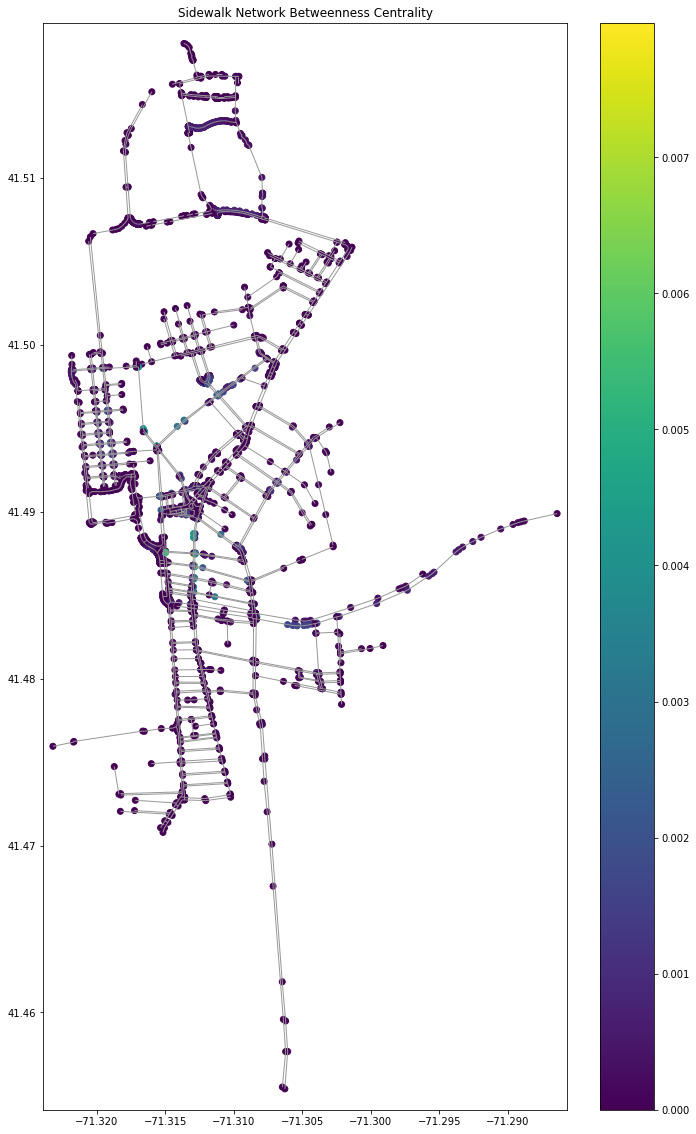

In [6]:
# Plot the graph - borrowing from osmnx.plot.plot_graph() - https://github.com/gboeing/osmnx/blob/master/osmnx/plot.py#L348
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig_height = 20
bgcolor = 'w'
edge_color = '#999999'
edge_linewidth = 1
edge_alpha = 1
margin = 0.02

west, south, east, north = gdf.total_bounds

bbox_aspect_ratio = (north-south)/(east-west)
fig_width = fig_height/bbox_aspect_ratio

node_Xs = [float(pt.x) for _, pt in G.nodes(data='point')]
node_Ys = [float(pt.y) for _, pt in G.nodes(data='point')]

# create the figure and axis
fig, ax = plt.subplots(figsize=(fig_width, fig_height), facecolor=bgcolor)
ax.set_facecolor(bgcolor)

lines = []

# draw edges as lines from node to node
for u, v, data in G.edges(keys=False, data=True):
    x1 = G.node[u]['point'].x
    y1 = G.node[u]['point'].y
    x2 = G.node[v]['point'].x
    y2 = G.node[v]['point'].y
    line = [(x1, y1), (x2, y2)]
    lines.append(line)

# add lines to linecollections
lc = LineCollection(lines, colors=edge_color, linewidths=edge_linewidth, alpha=edge_alpha, zorder=2)
ax.add_collection(lc)

cax = ax.scatter(node_Xs, node_Ys, c=list(btwn.values()))
cbar = fig.colorbar(cax)

# set the extent of the figure
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
ax.set_title("Sidewalk Network Betweenness Centrality")
plt.show()